# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_df = pd.read_csv('Data/Datasharktank147.csv')


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        146 non-null    int64  
 1   text                           145 non-null    object 
 2   post_text                      145 non-null    object 
 3   shared_text                    6 non-null      object 
 4   original_text                  5 non-null      object 
 5   time                           146 non-null    object 
 6   timestamp                      146 non-null    int64  
 7   image                          60 non-null     object 
 8   image_lowquality               146 non-null    object 
 9   images                         146 non-null    object 
 10  images_description             146 non-null    object 
 11  images_lowquality              146 non-null    object 
 12  images_lowquality_description  146 non-null    obj

In [18]:
raw_df[raw_df["is_live"] == True]

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,header,fetched_time


In [6]:
first_row = raw_df.iloc[70]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [7]:
reactions

{'like': 295, 'love': 22, 'care': 1, 'shares': 15, 'comments': 110}

## Reactions analysis

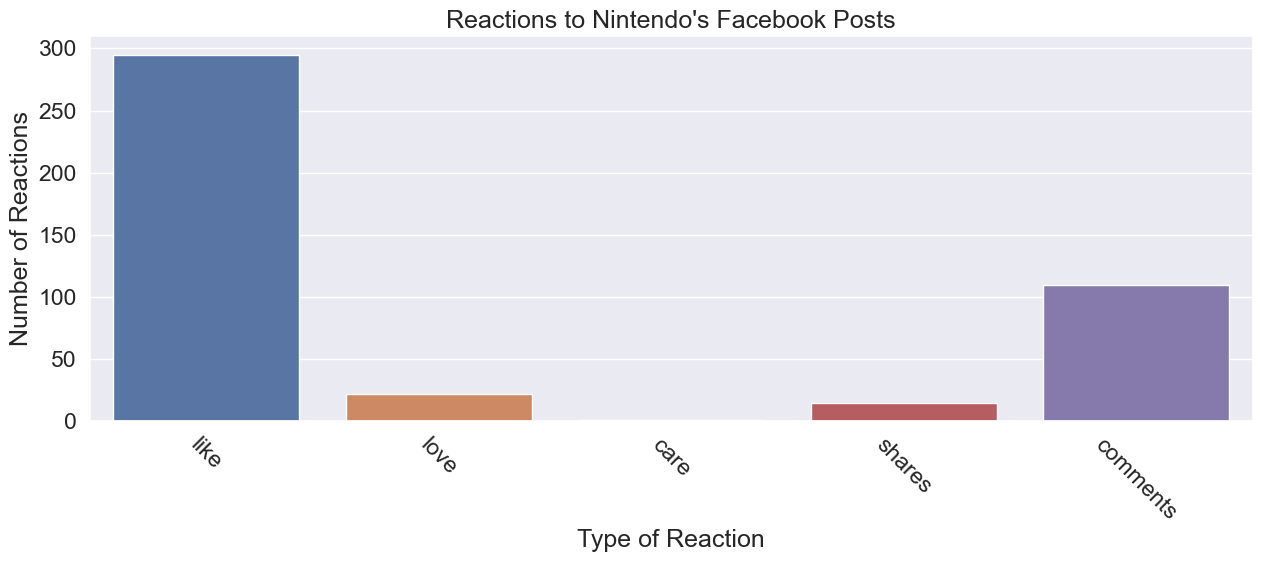

In [8]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Nintendo's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

## Read all posts

In [17]:
df_text = raw_df[['reactions','post_text']]
text    = str(df_text['post_text'])

df_text

,reactions,post_text
0,"{'like': 51, 'love': 2}","À lố, em à nhớ anh không 🤩\n\n• 20h30 • Monday..."
1,"{'like': 37, 'love': 10, 'haha': 8, 'care': 1}","Startup gì mà ""căng"" quá trời quơi\n\n#SharkTa..."
2,"{'like': 72, 'love': 4, 'haha': 20}",Ăn bánh mì nói chuyện tiền tỷ\n\n#SharkTankVie...
3,"{'like': 11, 'love': 2, 'haha': 1}","Startup nào ""trap"" Shark?\n\n20h30 • Monday • ..."
4,"{'like': 8, 'love': 1, 'haha': 1}",Sơ hở là chốt deal\n\n#SharkTankVietNam6 #Thuo...
...,...,...
141,"{'like': 46, 'love': 4, 'care': 1}",Xin được gửi lời cảm ơn chân thành tới các phó...
142,"{'like': 3576, 'love': 270, 'haha': 9, 'wow': ...","Startup dành cả thanh xuân để khởi nghiệp, Sha..."
143,"{'like': 135, 'love': 3}","Nữ founder bản lĩnh khiến bể cá mập ""nghẹt thở..."
144,"{'like': 18, 'love': 1, 'haha': 1}",💥 KẾT QUẢ MINIGAME EJOY💥\nĐáp án chính xác: D....


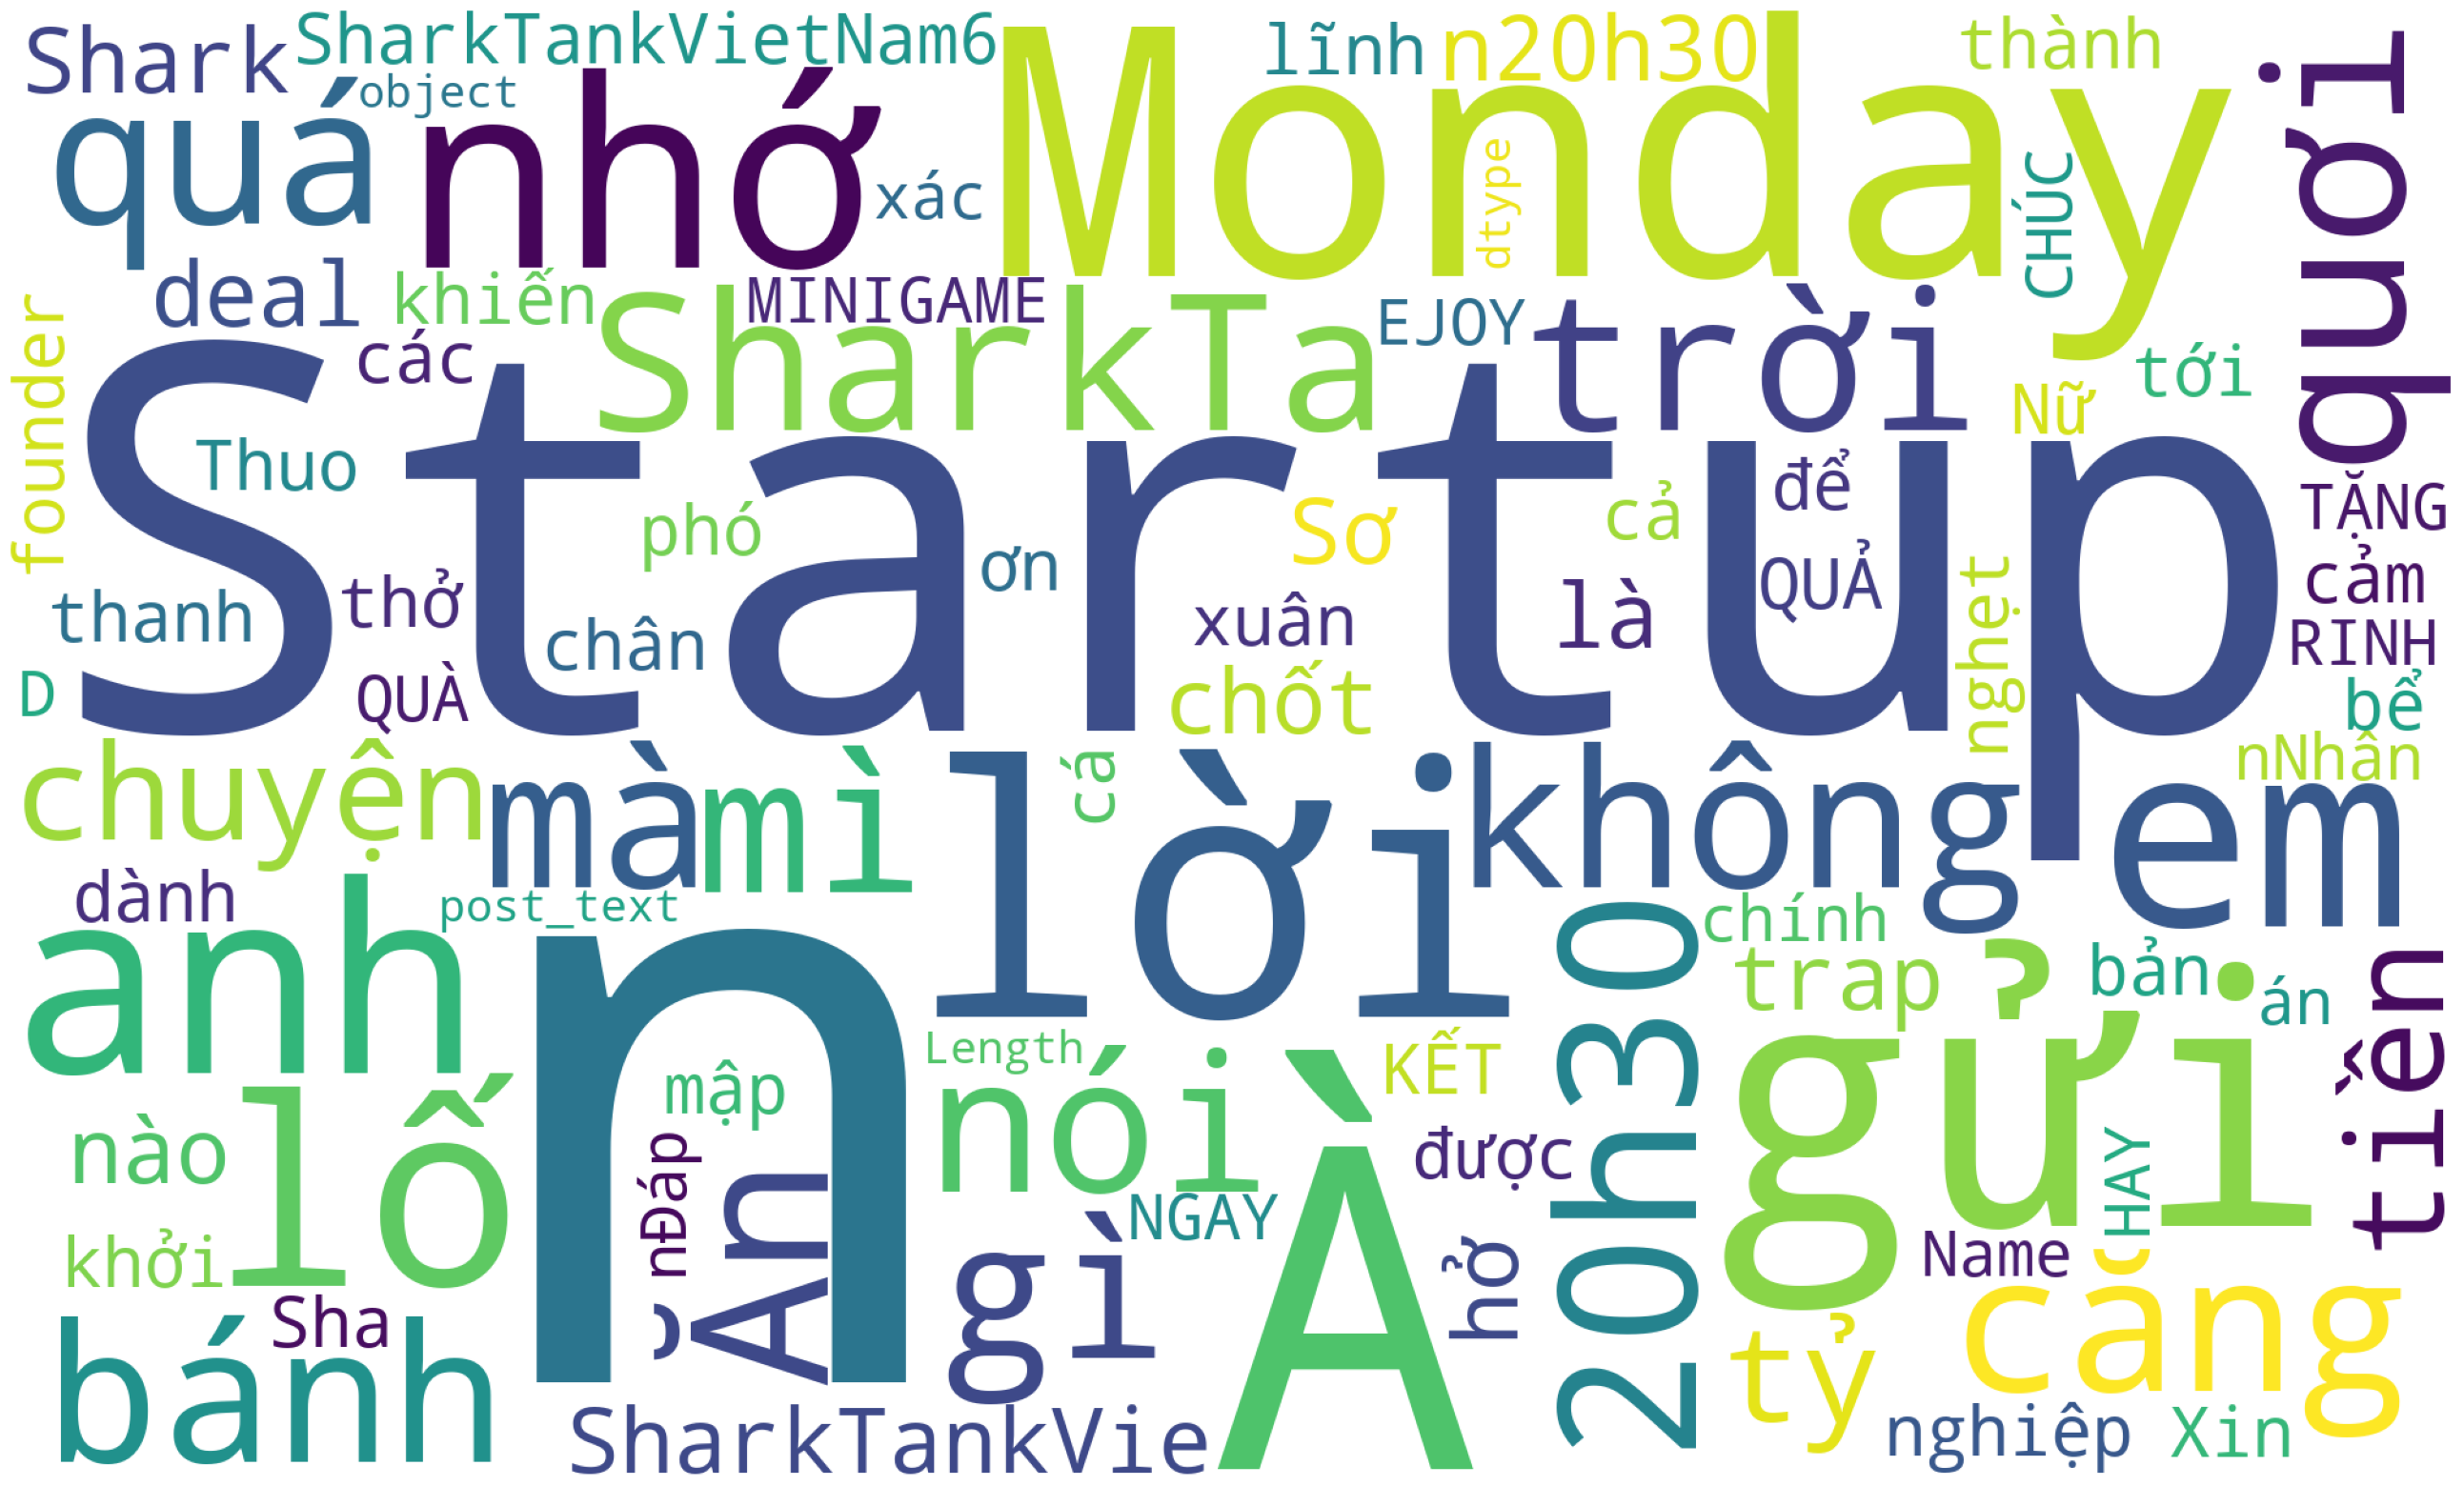

In [18]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()